# **Project Name**    - 



##### **Project Type**    - Regression 
##### **Contribution**    - Team
##### **Team Member 1 -** - Purushotam
##### **Team Member 2 -** - Rajat Sharma


# **Project Summary -**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. 

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") #This will ignore all DeprecationWarning warnings in your code.

In [ ]:
# importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
datafile1 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/colab projects/RegressionProject/Rossmann Stores Data.csv")
datafile2 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/colab projects/RegressionProject/store.csv")

### Dataset First View

In [ ]:
# Dataset First Look
datafile1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
datafile1.shape # checking the shape of the dataset 1

(1017209, 9)

In [ ]:
datafile2.head() 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
datafile2.shape # checking the shape of the dataset 2

(1115, 10)

In [ ]:
 datafile = pd.merge(datafile1, datafile2, on="Store") # we are merging the datasets

**Quick view of the merged datasets.**

In [ ]:
datafile.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
datafile.shape #checking the shape of the merged dataset 

(1017209, 18)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
datafile.shape # shape of final dataset

(1017209, 18)

### Dataset Information

In [ ]:
# Dataset Info
datafile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
datafile.duplicated().value_counts()

False    1017209
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
datafile.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<AxesSubplot:>

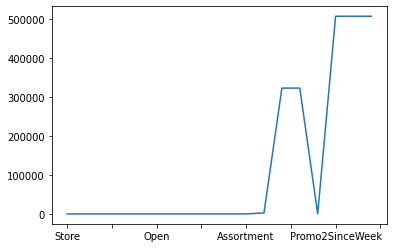

In [ ]:
# Visualizing the missing values
datafile.isnull().sum().plot()

### What did you know about your dataset?

**These are the following columns contains the null values.**

CompetitionDistance            2642

CompetitionOpenSinceMonth    323348

CompetitionOpenSinceYear     323348

Promo2SinceWeek              508031

Promo2SinceYear              508031

PromoInterval                508031

**This dataset does not contain duplicate values.**


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
datafile.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Variables Description 

In [ ]:
# Dataset Describe
datafile.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


We have 1017209 rows and 18 Columns out of which 13 columns are numerical and their mathmatical summary is provided above. 



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in range(0,len(datafile.columns)): # This loop will iterate over all the columns of the dataset.
  print("\nunique items in columns no ",i+1, "are:")

  print(datafile.iloc[:,i].unique())



unique items in columns no  1 are:
[   1    2    3 ... 1113 1114 1115]

unique items in columns no  2 are:
[5 4 3 2 1 7 6]

unique items in columns no  3 are:
['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05

## 3. ***Data Wrangling  & Feature Engineering***

**Making a copy of dataset before commtting any changes**

In [ ]:
# Write your code to make your dataset analysis ready.
retail_data = datafile.copy()

In [ ]:
retail_data['date'] = pd.to_datetime(retail_data['Date']) # converting object type Date to datetime by dateime function

In [ ]:
retail_data['year']=pd.DatetimeIndex(retail_data['date']).year # extracting year from the prepared date column

In [ ]:
retail_data['month'] = pd.DatetimeIndex(retail_data['date']).month  # extracting month from the prepared date column

In [ ]:
# eliminating the rows where the stores are closed, i.e. rows with Open ==0, as they are not relevant to predict sales.
retail_data = retail_data[retail_data.Open == 1]

### 1. Handling Missing Values

In [ ]:
#filling null values in Promo2 Since week, year and Promo Interval with 0

retail_data["Promo2SinceWeek"] = retail_data["Promo2SinceWeek"].fillna(0)
retail_data["Promo2SinceYear"] = retail_data["Promo2SinceYear"].fillna(0)
retail_data["PromoInterval"] = retail_data["PromoInterval"].fillna(0)

In [ ]:
#filling the null values with median for CompetitionDistance column and mode for CompetitionOpenSince Year and Month
retail_data["CompetitionDistance"].fillna(retail_data["CompetitionDistance"].median(),inplace=True)
retail_data["CompetitionOpenSinceMonth"].fillna(retail_data["CompetitionOpenSinceMonth"].mode()[0],inplace=True)
retail_data["CompetitionOpenSinceYear"].fillna(retail_data["CompetitionOpenSinceYear"].mode()[0],inplace=True)

In [ ]:
# adding a weekend column in our dataset with 0,1 values if weekend or weekdays respectively
Weekend = []
for row in retail_data['DayOfWeek']:
    if row < 6 :    Weekend.append(0)        
      
    else:           Weekend.append(1)

In [ ]:
#adding the weekend column in our dataset
retail_data['weekend'] = pd.Series(Weekend)

In [ ]:
retail_data['weekend'] = retail_data['weekend'].fillna(0) # filling the null value wih 0

**Dropping columns after changes**

In [ ]:
retail_data = retail_data.drop(columns=['Store','Open','Date','date'],axis = 1)

**Move the target column to the end of the dataset**

In [ ]:
last_column = retail_data.pop('Sales')

In [ ]:
retail_data.insert(17,'sales',last_column)

**Creating the copy the dataset for regular usage**

In [ ]:
data = retail_data.copy()

### What all manipulations have you done and insights you found?

**1- We have replace null values of**


CompetitionDistance            2642

CompetitionOpenSinceMonth    323348

CompetitionOpenSinceYear     323348

Promo2SinceWeek              508031

Promo2SinceYear              508031

PromoInterval                508031

**2- We have moved the target column Sales to the end of the dataset**.

**3- We have converted object Date column to datetime and extracted year and month from the date column.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Univariant analysis**

This is dist plot and its details are  Series([], Name: DayOfWeek, dtype: int64) 



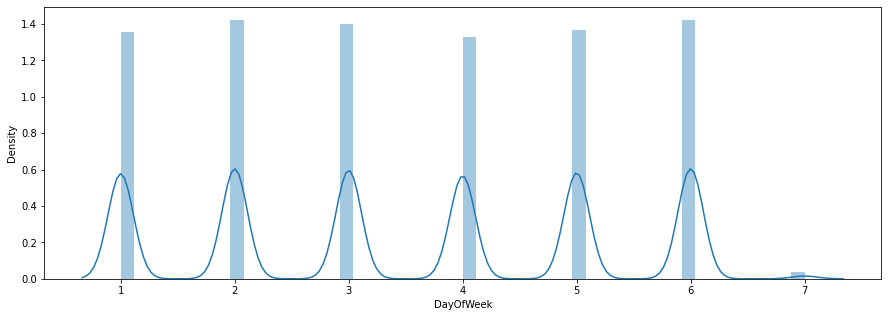

This is dist plot and its details are  Series([], Name: Customers, dtype: int64) 



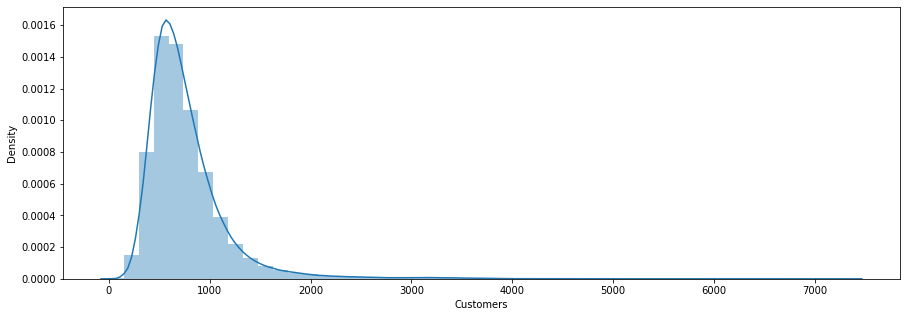

This is dist plot and its details are  Series([], Name: Promo, dtype: int64) 



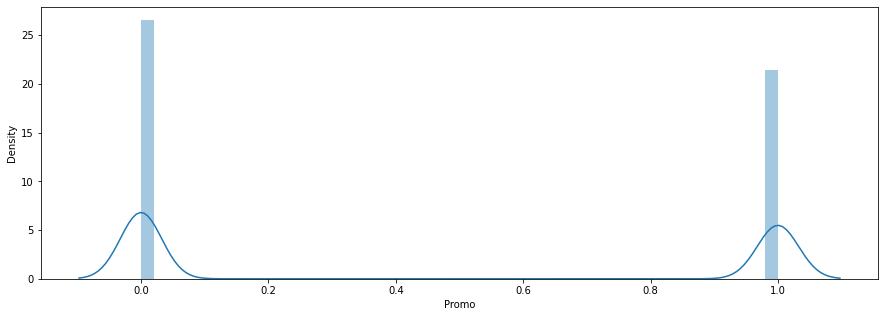

This is dist plot and its details are  Series([], Name: SchoolHoliday, dtype: int64) 



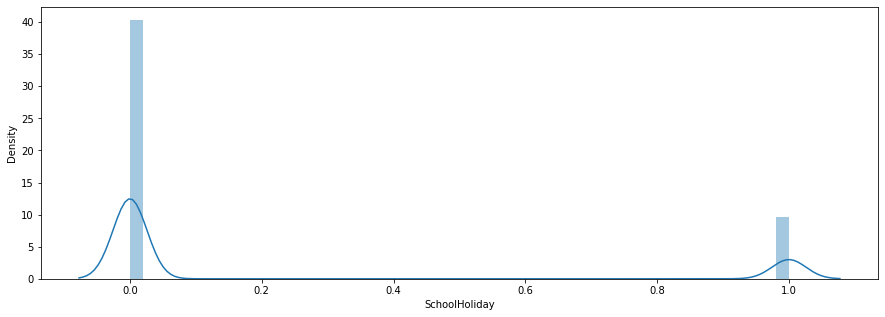

This is dist plot and its details are  Series([], Name: CompetitionDistance, dtype: float64) 



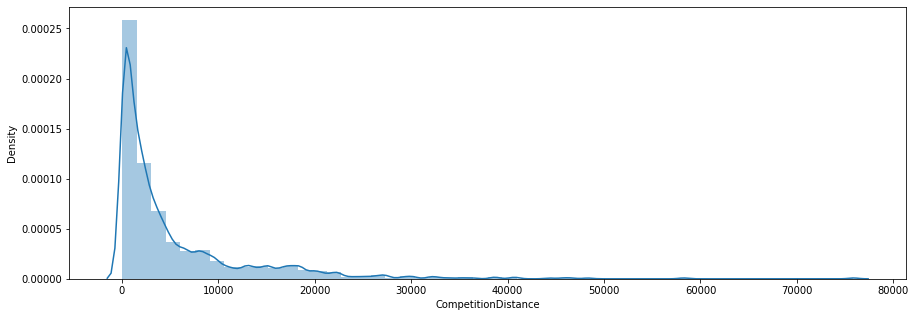

This is dist plot and its details are  Series([], Name: CompetitionOpenSinceMonth, dtype: float64) 



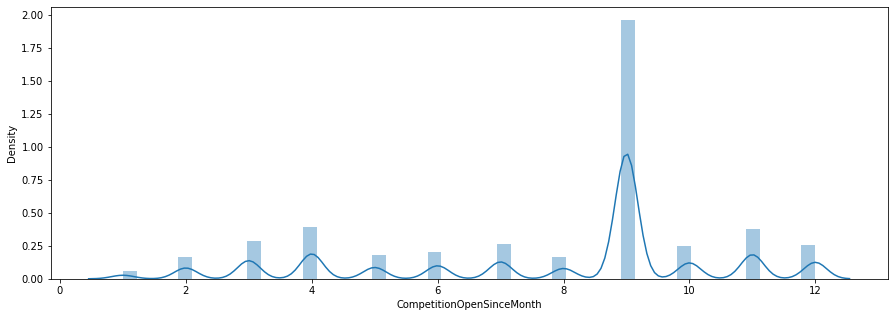

This is dist plot and its details are  Series([], Name: CompetitionOpenSinceYear, dtype: float64) 



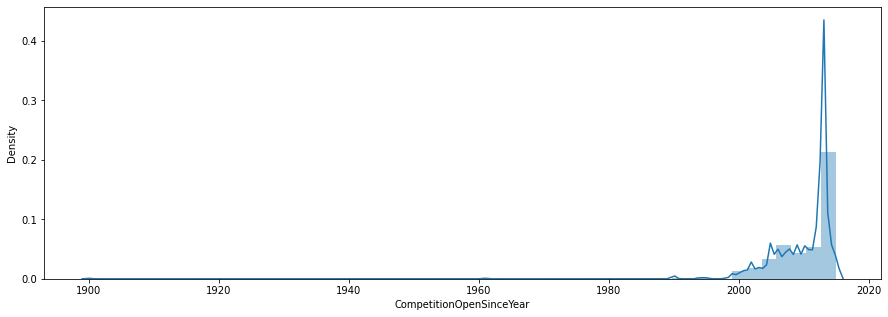

This is dist plot and its details are  Series([], Name: Promo2, dtype: int64) 



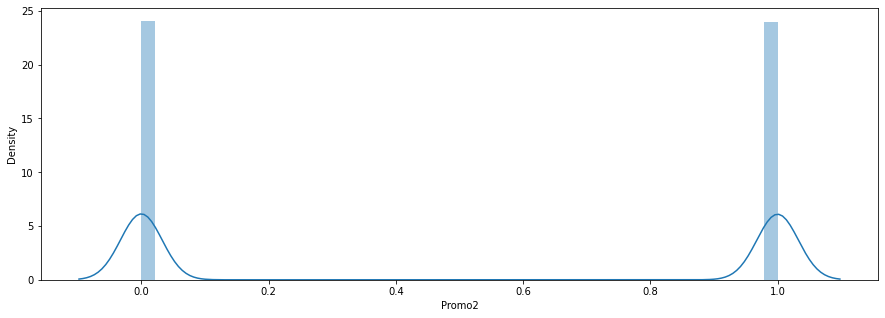

This is dist plot and its details are  Series([], Name: Promo2SinceWeek, dtype: float64) 



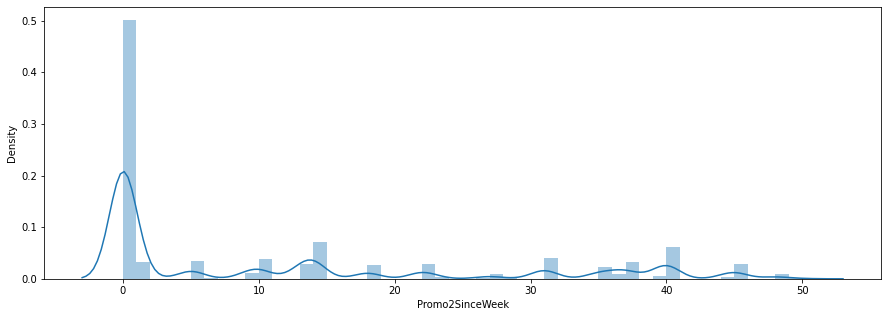

This is dist plot and its details are  Series([], Name: Promo2SinceYear, dtype: float64) 



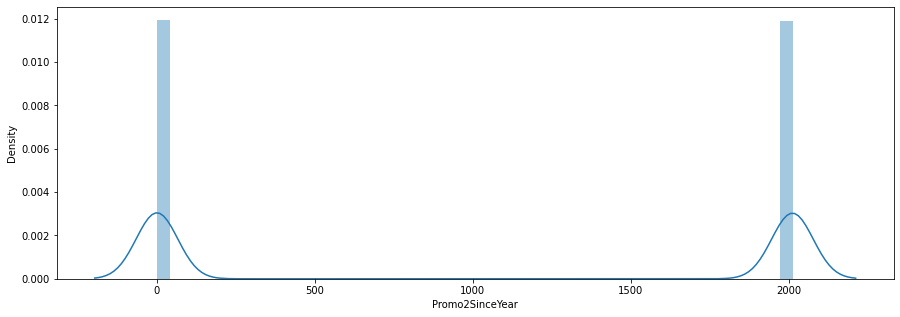

This is dist plot and its details are  Series([], Name: year, dtype: int64) 



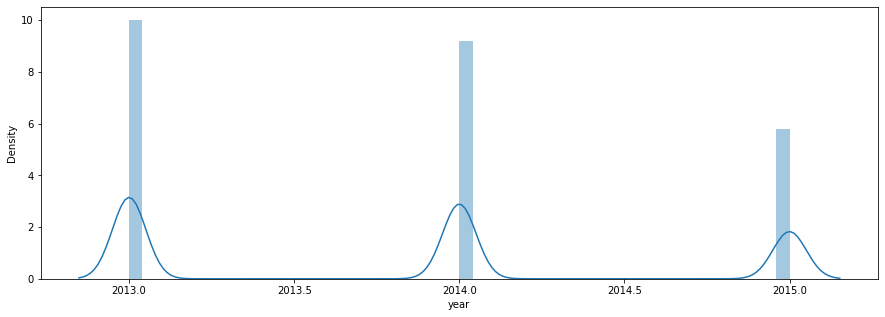

This is dist plot and its details are  Series([], Name: month, dtype: int64) 



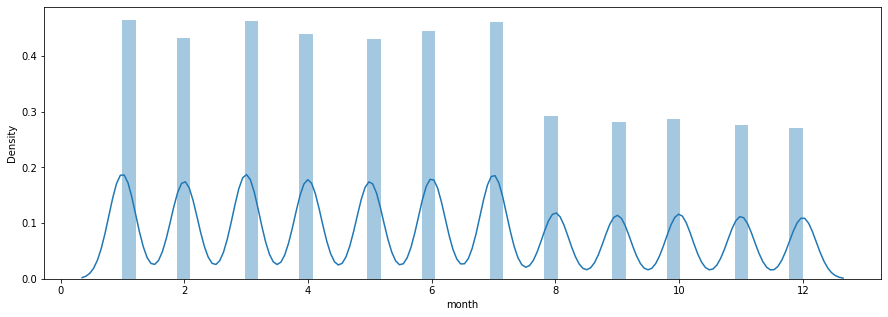

This is dist plot and its details are  Series([], Name: weekend, dtype: float64) 



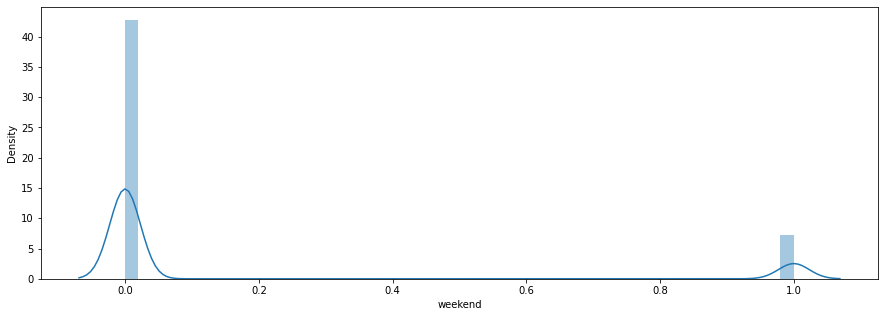

This is dist plot and its details are  Series([], Name: sales, dtype: int64) 



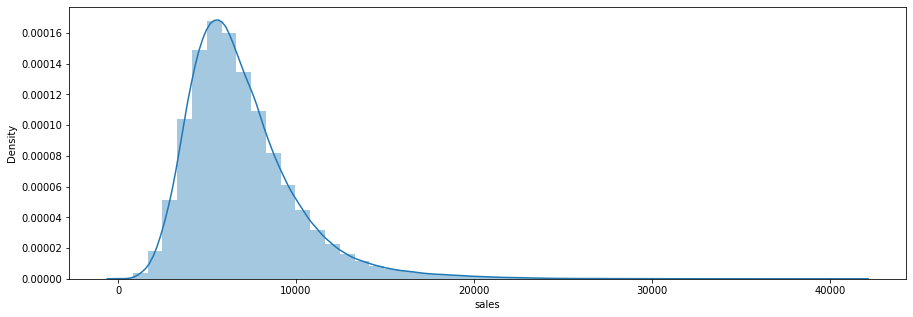

In [ ]:
# Chart - 1 visualization code 
for values in range(0,len(data.columns)): # It will iterate over columns
  if np.issubdtype(data.iloc[:,values].dtype, np.number) == True: # This condition will check if the column is numerical.
    plt.figure(figsize=(15,5, ))
    plt.title(print("This is dist plot and its details are ",data.iloc[0:0,values],'\n'))
    sns.distplot(data.iloc[:,values])
    plt.show()

##### 1. Why did you pick the specific chart?

Kernel Density Estimate (KDE) Plot and Kdeplot allows us to estimate the probability density function of the continuous or non-parametric from our data set curve in one or more dimensions it means we can create plot a single graph for multiple samples which helps in more efficient data visualization.

##### 2. What is/are the insight(s) found from the chart?

Columns like Customers Schoolholiday, competitionDistance, promo2sinceweek, year, weekend, Sales are right skewed while competitionOpenSinceYear is left skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


From the univariant analysis from kde plot the company can take necessary steps to make their profit by analysing individual variables.



#### Chart - 2

Box plot - To check outliers

This is Box plot and its details are  Series([], Name: DayOfWeek, dtype: int64) 



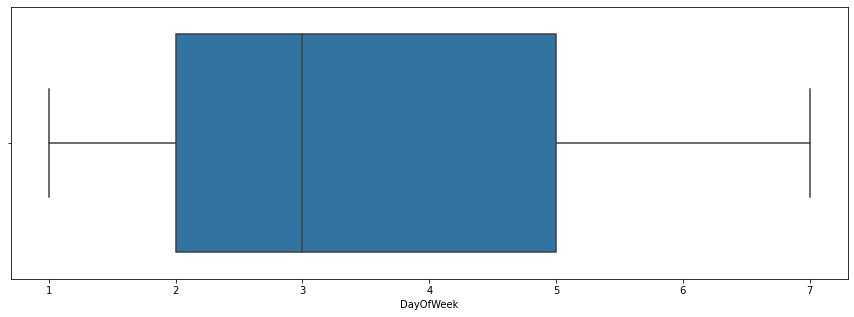

This is Box plot and its details are  Series([], Name: Customers, dtype: int64) 



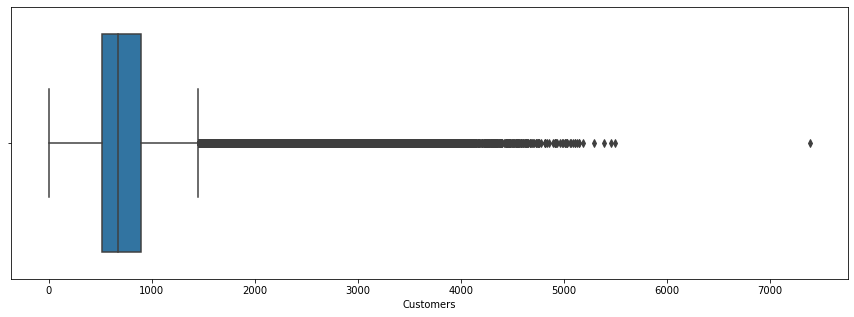

This is Box plot and its details are  Series([], Name: Promo, dtype: int64) 



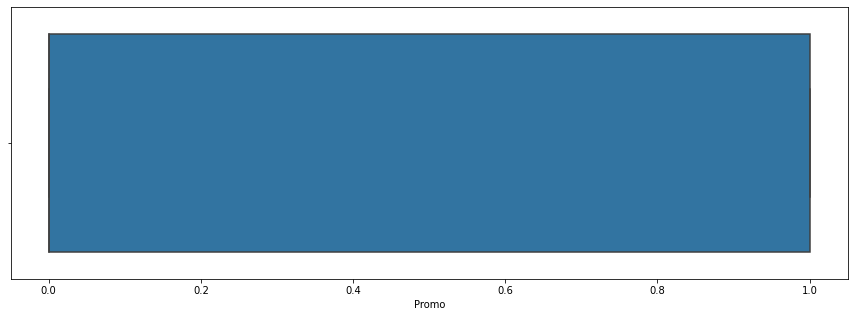

This is Box plot and its details are  Series([], Name: SchoolHoliday, dtype: int64) 



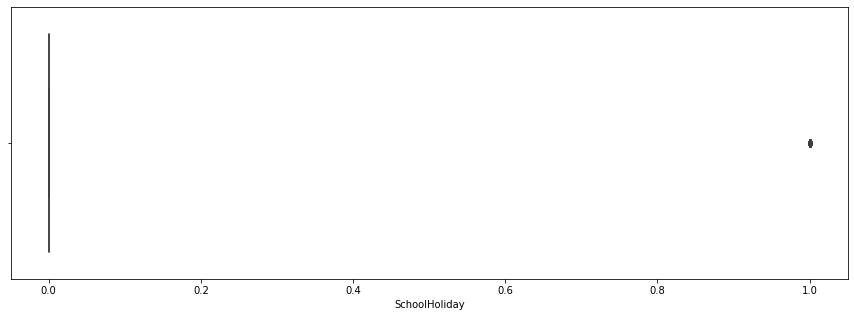

This is Box plot and its details are  Series([], Name: CompetitionDistance, dtype: float64) 



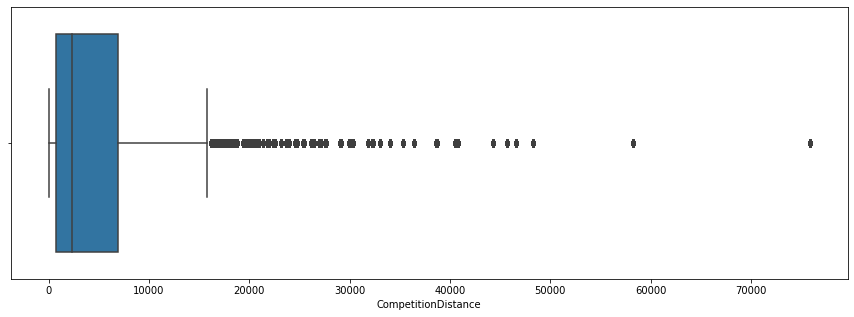

This is Box plot and its details are  Series([], Name: CompetitionOpenSinceMonth, dtype: float64) 



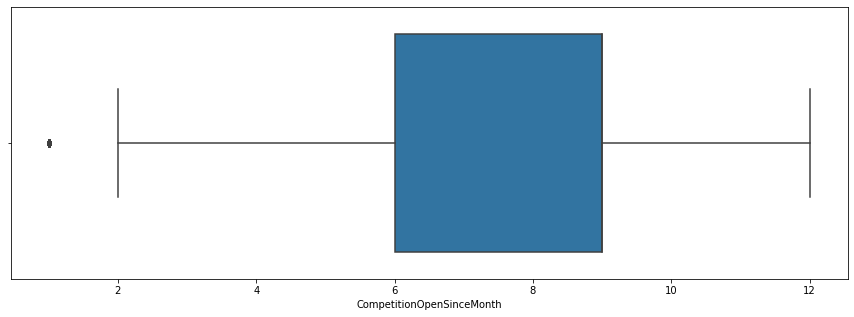

This is Box plot and its details are  Series([], Name: CompetitionOpenSinceYear, dtype: float64) 



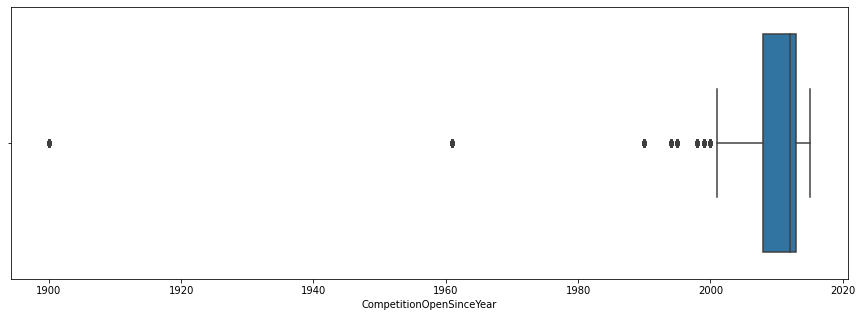

This is Box plot and its details are  Series([], Name: Promo2, dtype: int64) 



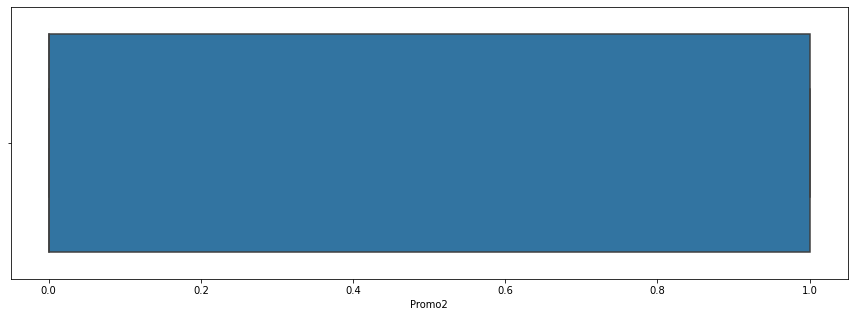

This is Box plot and its details are  Series([], Name: Promo2SinceWeek, dtype: float64) 



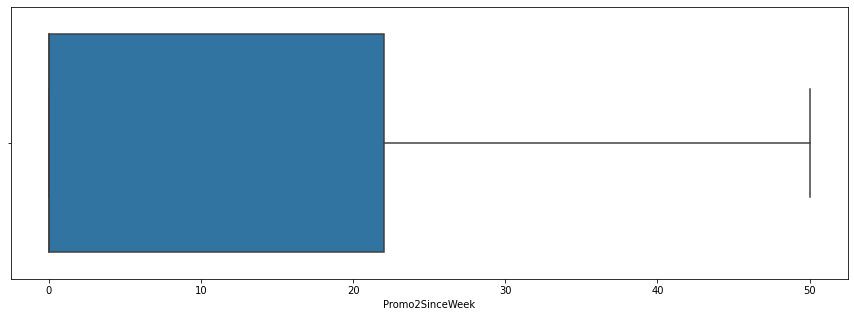

This is Box plot and its details are  Series([], Name: Promo2SinceYear, dtype: float64) 



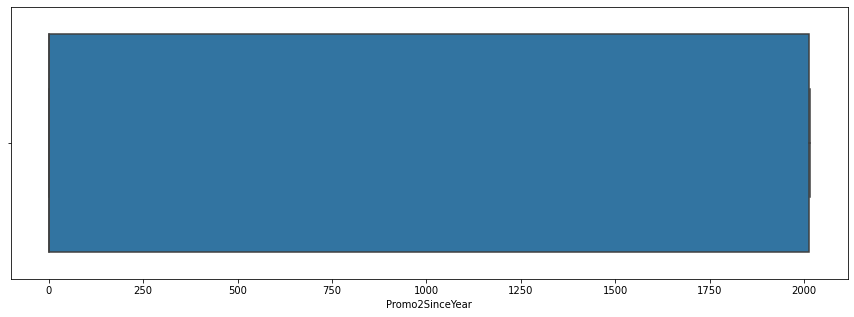

This is Box plot and its details are  Series([], Name: year, dtype: int64) 



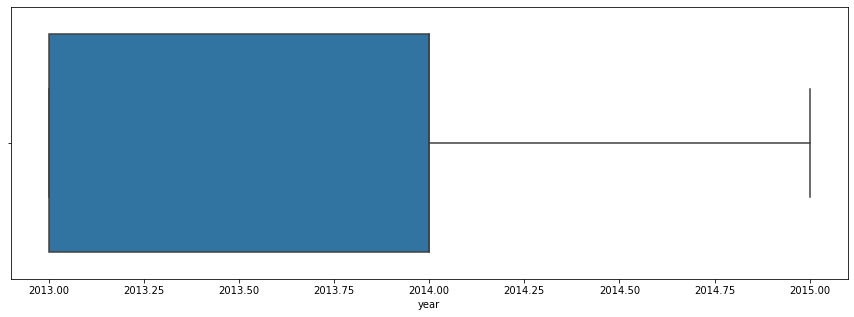

This is Box plot and its details are  Series([], Name: month, dtype: int64) 



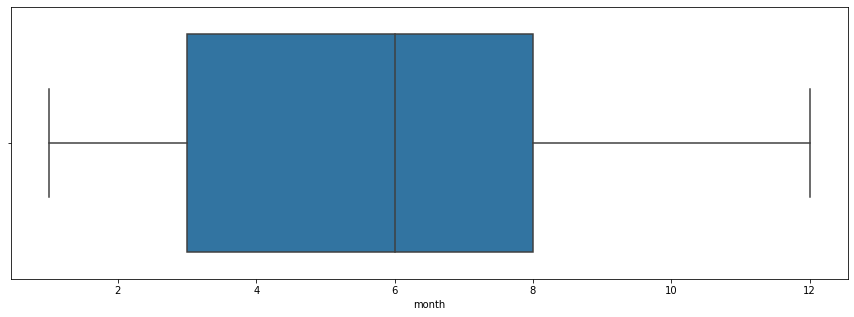

This is Box plot and its details are  Series([], Name: weekend, dtype: float64) 



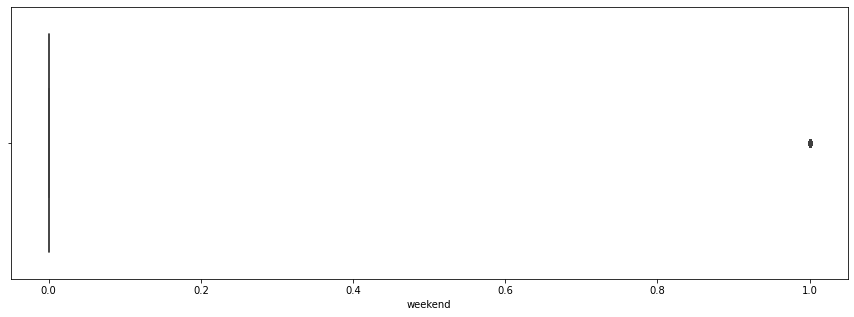

This is Box plot and its details are  Series([], Name: sales, dtype: int64) 



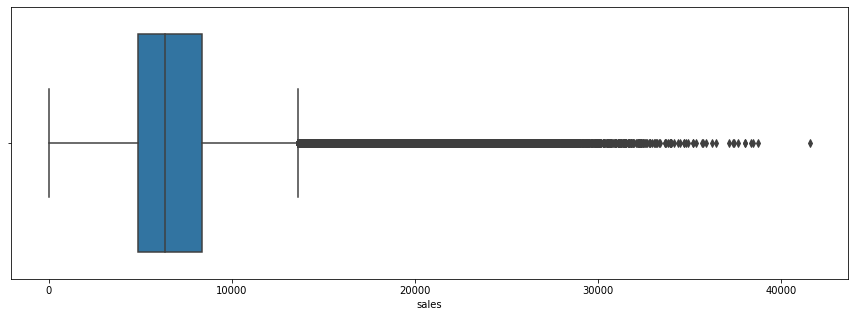

In [ ]:
# Chart - 2 visualization code
for values in range(0,len(data.columns)): # It will iterate over columns
  if np.issubdtype(data.iloc[:,values].dtype, np.number) == True:  # This condition will check if the column is numerical
    plt.figure(figsize=(15,5))
    plt.title(print("This is Box plot and its details are ",data.iloc[0:0,values],'\n'))
    sns.boxplot(data.iloc[:,values])
    plt.show()

##### 1. Why did you pick the specific chart?

This box plots shows the five-number summary of the data – the minimum, first quartile, median, third quartile, and maximum.

##### 2. What is/are the insight(s) found from the chart?

customer, competitionDistance, competitionopensincemonth, competitionopensinceyear, Sales contains the outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the univariant analysis by box plot the company can take necessary steps to analyse the data to verify the presence of outlier in the data.


#### Chart - 3

**Bivariant Analysis**

This is bar plot and its details are  Series([], Name: DayOfWeek, dtype: int64) 



<AxesSubplot:xlabel='DayOfWeek', ylabel='sales'>

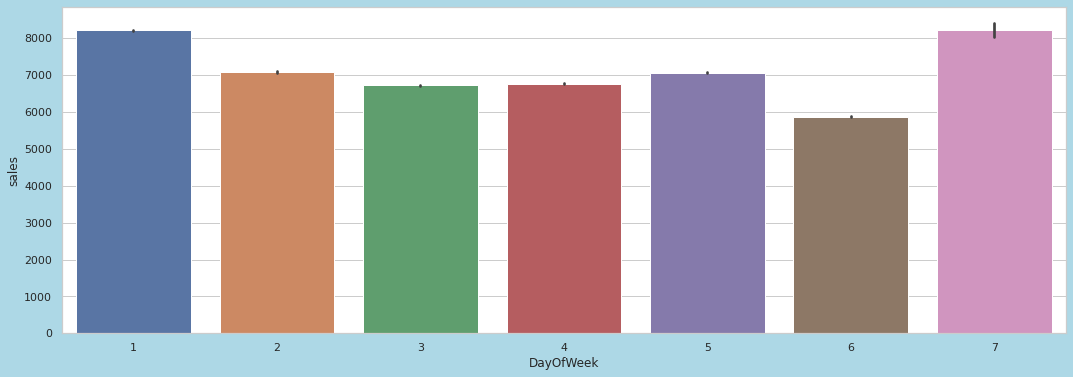

In [ ]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is bar plot and its details are ",data.iloc[0:0,0],'\n')
sns.barplot(data.iloc[:,0],data.iloc[:,-1]) 

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

In this chart we get the number of sales in the whole week per day.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this graph we can see number of sales according to the day so a businessman can drive the need of supply of goods as per demand.

#### Chart - 4

This is Scatter plot and its details are  Series([], Name: Customers, dtype: int64) 



<AxesSubplot:xlabel='Customers', ylabel='sales'>

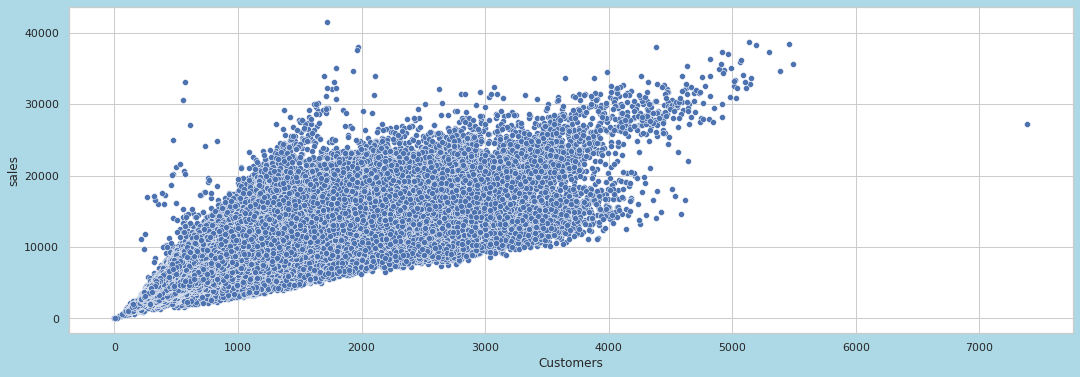

In [ ]:
# Chart - 4 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Scatter plot and its details are ",data.iloc[0:0,1],'\n')
sns.scatterplot(data.iloc[:,1],data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

This Scatter plot is used to obtain the correlational relationship between two numerical variables.

##### 2. What is/are the insight(s) found from the chart?

As the number of customer increases the sales of the company also increases so it is a positive correlation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company needs to increase the number of customers to raise the sales value.

#### Chart - 5

This is Bar plot and its details are  Series([], Name: Promo, dtype: int64) 



<AxesSubplot:xlabel='Promo', ylabel='sales'>

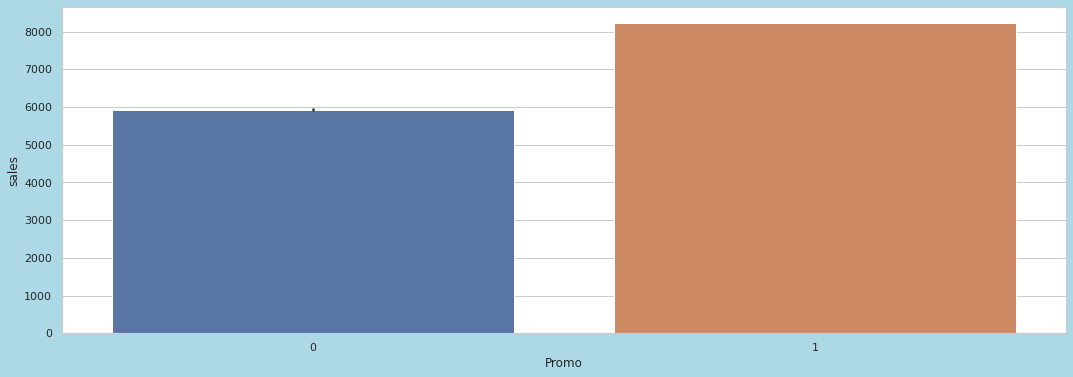

In [ ]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Bar plot and its details are ",data.iloc[0:0,2],'\n')
sns.barplot(data.iloc[:,2],data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

The sales value is high if the promo provided.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If business is beneficial with the promos then to raise the sales the company should consider to provide the promo.

#### Chart - 6

This is Bar plot and its details are  Series([], Name: SchoolHoliday, dtype: int64) 



<AxesSubplot:xlabel='SchoolHoliday', ylabel='sales'>

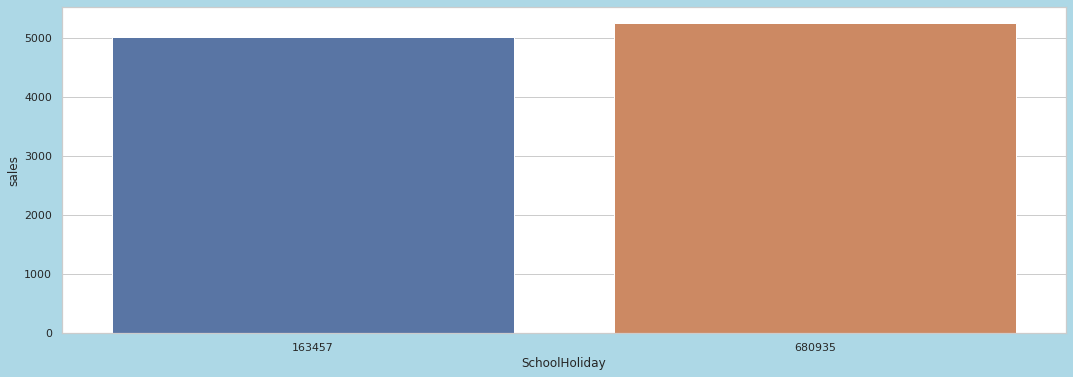

In [ ]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Bar plot and its details are ",data.iloc[0:0,4],'\n')
sns.barplot(data.iloc[:,4].value_counts(),data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

From the graph we have found that the sales are 61% higher for the school holiday then the school day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this graph the company can see the promise of better sales on school holiday so before school holiday the company can ensure the availability of goods as per demand.

#### Chart - 7

This is Bar plot and its details are  Series([], Name: StoreType, dtype: object) 



<AxesSubplot:xlabel='StoreType', ylabel='sales'>

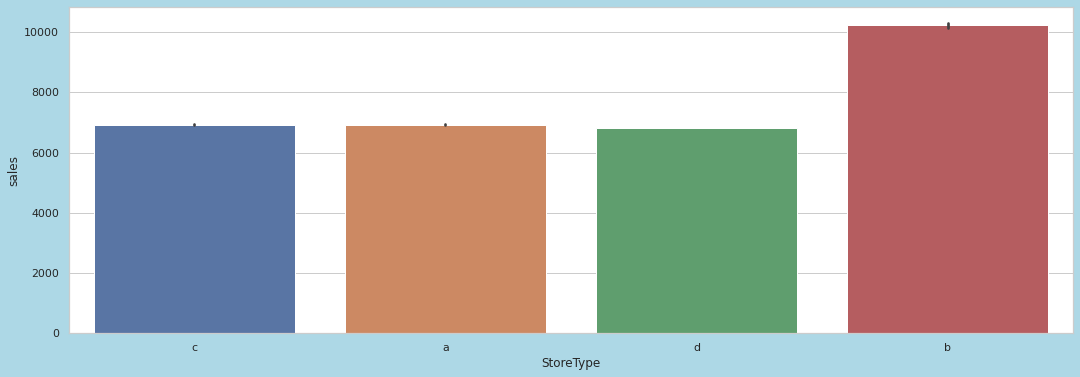

In [ ]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Bar plot and its details are ",data.iloc[0:0,5],'\n')
sns.barplot(data.iloc[:,5],data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

[sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

From this graph we can see that we have four types of stores and  store b has the maximum number of sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As store b has the maximum sales we can incentivise the staff to set the role model for the store a,c and d they can increase the sales.

#### Chart - 8

This is Bar plot and its details are  Series([], Name: Assortment, dtype: object) 



<AxesSubplot:xlabel='Assortment', ylabel='sales'>

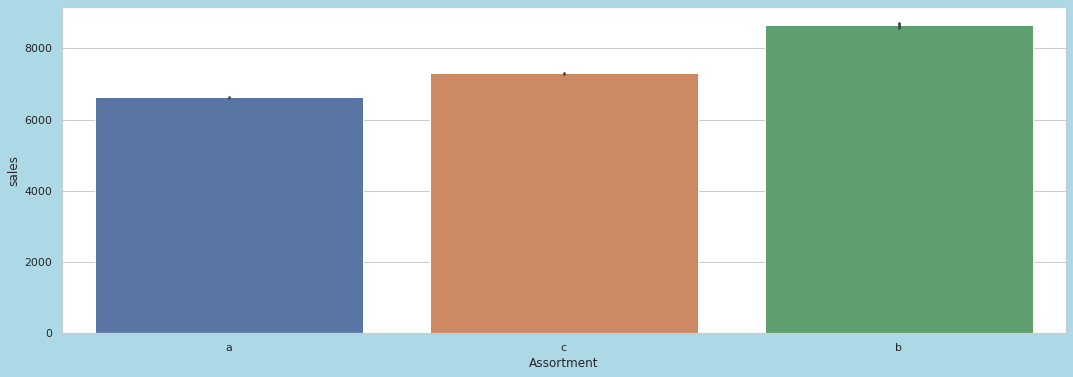

In [ ]:
# Chart - 8 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Bar plot and its details are ",data.iloc[0:0,6],'\n')
sns.barplot(data.iloc[:,6],data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

From the graph we can see that product b has the maximum sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company must ensure the supply of product b and as per demand raise and company must analyse the sale of a.

#### Chart - 9

This is Scatter plot and its details are  Series([], Name: CompetitionDistance, dtype: float64) 



<AxesSubplot:xlabel='CompetitionDistance', ylabel='sales'>

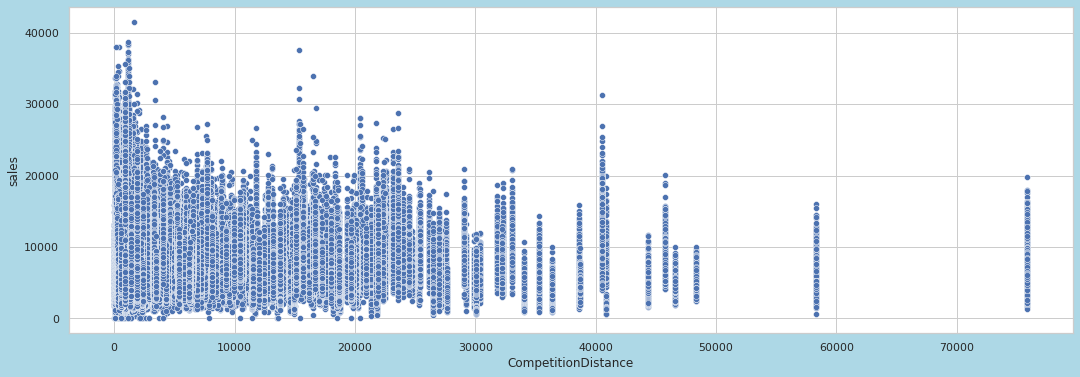

In [ ]:
# Chart - 9 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Scatter plot and its details are ",data.iloc[0:0,7],'\n')
sns.scatterplot(data.iloc[:,7],data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

This Scatter plot is used to obtain the correlational relationship between two numerical variables.

> Indented block



##### 2. What is/are the insight(s) found from the chart?

From the graph we can see that the sales is reducing when the competitiondistance is increasing. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the analysis of this graph we can take sum essential steps to reduce the competitiondistance if they are beneficial.

#### Chart - 10

This is Bar plot and its details are  Series([], Name: CompetitionOpenSinceMonth, dtype: float64) 



<AxesSubplot:xlabel='CompetitionOpenSinceMonth', ylabel='sales'>

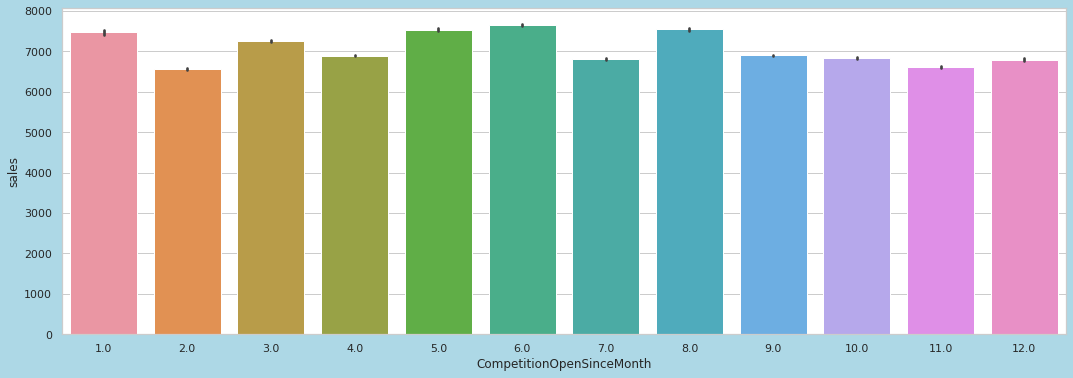

In [ ]:
# Chart - 10 visualization code
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
print("This is Bar plot and its details are ",data.iloc[0:0,8],'\n')
sns.barplot(data.iloc[:,8],data.iloc[:,-1])

##### 1. Why did you pick the specific chart?

sns.barplot will create a “dodged” bar chart, where the color of the bars is set according to the hue variable.

##### 2. What is/are the insight(s) found from the chart?

From this graph we can see the sale on the month of 1.0, 5.0, 6.0, 8.0, is higher than the sale in other months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Roseman must ensure the availability of goods in demand in the month when demands are high.


## **Multivariate analysis**

#### Chart - 11 - Correlation Heatmap

<AxesSubplot:>

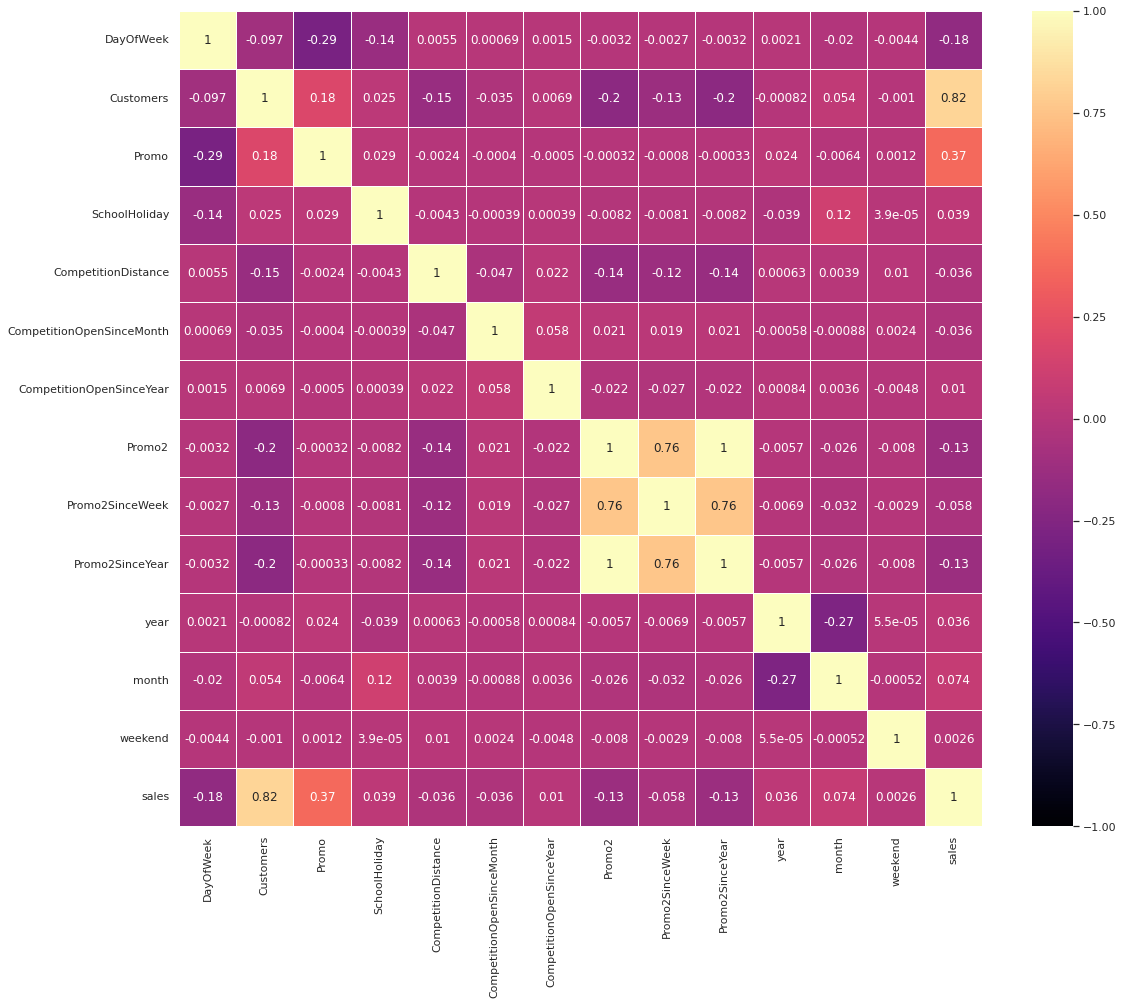

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (18, 15))
sns.heatmap(data.corr(),vmin=-1,vmax=1, annot=True, cmap='magma', linewidths=0.8)

##### 1. Why did you pick the specific chart?

Heat Maps are graphical representations of data that utilize color-coded systems. The primary purpose of this Heat Map is to better visualize collinearity of the columns within the dataset and assist us towards understanding the linear collinearlity.

##### 2. What is/are the insight(s) found from the chart?

1- The customers column and the sales column is positively correlated.


2- Promo2 is also positively correlated with promo2sinceyear.


3- Dayofweek is negatively correlated with sales -0.18 and competition distance is also negatively correlated -0.15.


4-Promo and dayofweek also negatively correlated -0.29 this shows promo is  avoided on dayofweek.

#### Chart - 12 - Pair Plot 

In [ ]:
# Pair Plot visualization code
print("This is pair plot \n")
# sns.pairplot(data)

This is pair plot 



##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

##### 2. What is/are the insight(s) found from the chart?

From the pair plot we can see that law of collinearity exits or all the independent variables do not depend on each other or there is no relation between them.

In [ ]:
data['DayOfWeek'].value_counts()

6    144058
2    143961
3    141936
5    138640
1    137560
4    134644
7      3593
Name: DayOfWeek, dtype: int64

## ***5. Hypothesis Testing***

More promos are provided in last 3 days that is 5,6 and 7th day of the week

In [ ]:
# Making copy of df_clean_frame
hypothesis=data[['DayOfWeek','Promo']].copy()
hypothesis = hypothesis[hypothesis["Promo"] == 1]

# Group_by duration and target_ages                 
group_by_= hypothesis['Promo'].groupby(by=hypothesis['DayOfWeek'])

# Mean of group_by variable
group=group_by_.mean().reset_index()

# In A and B variable grouping values 
one = (hypothesis.loc[hypothesis["DayOfWeek"] < 5 ]).sum()
print(one)
two = (hypothesis.loc[hypothesis["DayOfWeek"] > 4]).sum()

# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for Promo in 1st 3 days {} \n Mean for Promo last 3 days {}'.format(Mean1,Mean2))
print('Std deviation for Promo in 1st 3 days {} \n Std deviation for Promo last 3 days {}'.format(SD2,SD1))

DayOfWeek    756742
Promo        304741
dtype: int64
Mean for Promo in 1st 3 days 530741.5 
 Mean for Promo last 3 days 216465.0
Std deviation for Promo in 1st 3 days 204085.15918606136 
 Std deviation for Promo last 3 days 319612.9722031007


In [ ]:
# Perform Statistical Test to obtain P-Value
#Import stats 
from scipy import stats
# Length of groups and DOF
len1 = len(one)
len2= len(two)
print(len1,len2)

dof = len1+len2-2
print('dof',dof)

sp_2 = ((len2-1)*SD2  + (len1-1)*SD2*2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t-value
t_value = (Mean1-Mean2)/(sp * np.sqrt(1/len1 + 1/len2))
print('t-value',t_value)

2 2
dof 2
SP_2 = 306127.73877909203
SP 553.2881155230899
t-value 568.0159959750383


In [ ]:
stats.t.ppf(0.025,dof)

-4.3026527299112765

In [ ]:
stats.t.ppf(0.975,dof)

4.302652729911275

thus we reject NUll hypothesis, movies for kids and older kids are two hours long

Answer Here: T-Test

Answer Here:  t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

# **6.  Pre-processing**

**Check for the colinearity**

In [ ]:
#importing relevant library
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

                    variables           VIF
0                   DayOfWeek  5.794421e+00
1                   Customers  1.663688e+01
2                       Promo  2.338553e+00
3               SchoolHoliday  1.282455e+00
4         CompetitionDistance  1.628477e+00
5   CompetitionOpenSinceMonth  8.940185e+00
6    CompetitionOpenSinceYear  1.403785e+05
7                      Promo2  1.574028e+06
8             Promo2SinceWeek  3.982967e+00
9             Promo2SinceYear  1.572974e+06
10                       year  1.402165e+05
11                      month  4.188783e+00
12                    weekend  1.169805e+00
13                      sales  2.320044e+01


<AxesSubplot:>

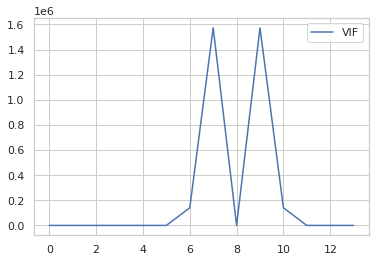

In [ ]:
# Calculating VIF for all the columns
print(calc_vif(data[[i for i in data.describe().columns if i not in ['Store','Sales','Weekend']]])) 
(calc_vif(data[[i for i in data.describe().columns if i not in ['Store','Sales','Weekend']]])).plot()  # We will plot the VIF obtain by the  VIF function.

### 1. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

We will implement Robust Scalar to deal with outliers in the column and it will also normalise the data.

### 3. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
dependent = data['sales'] #  we will define dependent variable here.

In [ ]:
independent = data.drop(['sales','StateHoliday','PromoInterval'],axis=1) # we wil independent variable here.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(independent,dependent,test_size = .3, random_state =100) #  Defining spliting conditions.

##### What data splitting ratio have you used and why? 

We like to keep test data 30% as we have enough data to test our model in case our model will underfit or overfit

### 2. Data Transformation

#### Do you think that your data needs to be Transformation? If yes, which transformation have you used. Explain Why?

We will apply one hot Encoding on the dataset  

In [ ]:
ohe = OneHotEncoder(drop = 'first', sparse=False, dtype=np.int16, handle_unknown="ignore") # This will convert categorical variable to integer numerical variables.

In [ ]:
objectcoders = ['StoreType', 'Assortment'] # we will define object type columns here.
numcoders = ['DayOfWeek', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',  # we wiil define numericsl columns here.
       'Promo2SinceWeek', 'Promo2SinceYear', 'year', 'month', 'weekend']

In [ ]:
# Applying Transformer Encoder
transformer = ColumnTransformer(transformers = [ 
    ('tnfnum', ohe, numcoders),
    ('tnfobj', ohe, objectcoders)
],remainder = 'passthrough')

In [ ]:
xtrain = transformer.fit_transform(xtrain) # Fitting transformer Encoder on Xtrain.

In [ ]:
xtest = transformer.transform(xtest) # Applying transformer  encoder on xtest.

### 4. Data Normalization

#### Do you think that your data needs to be Normalised? If yes, which Normalisation have you used. Explain Why?

We have user Robust Scalar in order to normalise the data and handle the outliers.

In [ ]:
# Transform Your data
scaler = RobustScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
linear = LinearRegression()
# Fit the Algorithm
lmodel = linear.fit(xtrain,ytrain)
# Predict on the model
ypred = linear.predict(xtest)

<AxesSubplot:xlabel='sales'>

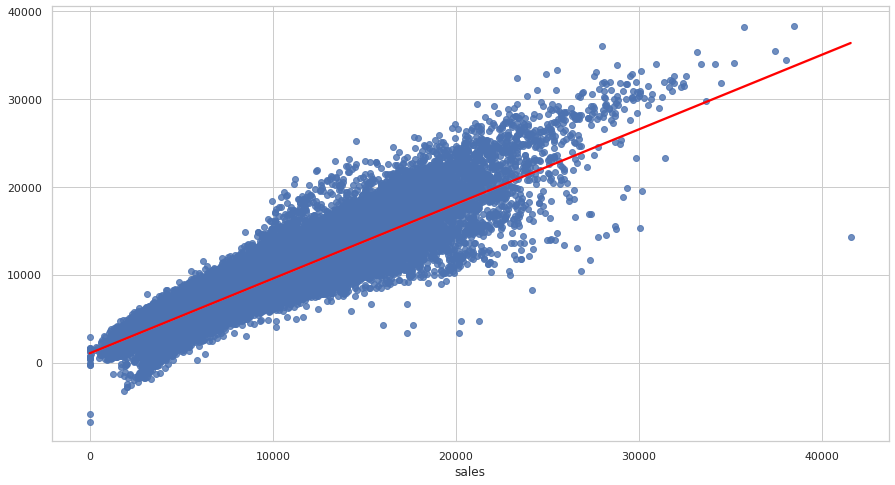

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ytest, y=ypred, data=xtest, line_kws={"color" : 'red'})

**Function to calculate root mean square error**

In [ ]:
def rmse(x, y):     
    return sqrt(mean_squared_error(x, y))

### Validation for linear model

In [ ]:
# validation
print("Regresion Model Score" , ":" , lmodel.score(xtrain, ytrain) , "\n" ,
      "Out of Sample Test Score" ,":" , lmodel.score(xtest, ytest))
print('\n')
ylpredicted = linear.predict(xtrain)
yltpredicted = linear.predict(xtest)
print("Training RMSE", ":", rmse(ytrain, ylpredicted),
      "\nTesting RMSE", ":", rmse(ytest, yltpredicted))


Regresion Model Score : 0.8460517552266272 
 Out of Sample Test Score : 0.8470116279275661


Training RMSE : 1218.525934128581 
Testing RMSE : 1212.888983109547


0.8470116279275661


<AxesSubplot:xlabel='sales', ylabel='Density'>

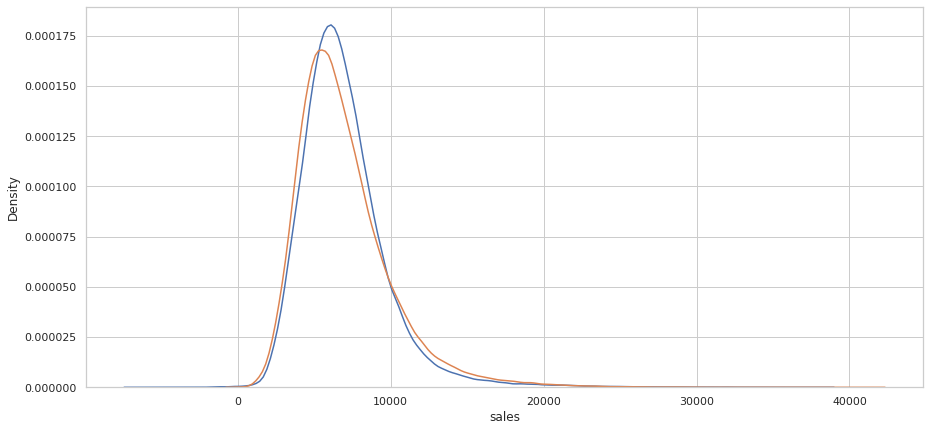

In [ ]:
# Getting the accuracy score for linear model.
rscore = r2_score(ytest,ypred) # getting R2 score
print(rscore)

# Visualizing evaluation Metric Score chart 
plt.figure(figsize=(15,7))
sns.kdeplot(ypred)
sns.kdeplot(ytest)

# **Optimization of Linear Regression**

### **Ridge Regression**

In [ ]:
ridge = Ridge()
# Fit the Algorithm
rdgreg = ridge.fit(xtrain, ytrain)
# Predict on the model
yrtpredicted = ridge.predict(xtest)

<AxesSubplot:xlabel='sales'>

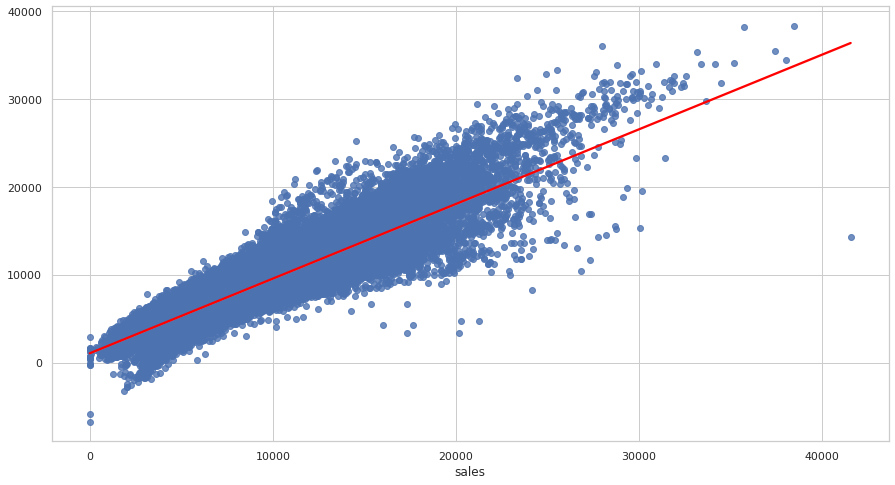

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ytest, y=yrtpredicted, data=xtest, line_kws={"color" : 'red'})

In [ ]:
# validation
print("Regresion Model Score" , ":" , rdgreg.score(xtrain, ytrain) , "\n" ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xtest, ytest))
print('\n')
yrpredicted = rdgreg.predict(xtrain)

print("Training RMSE", ":", rmse(ytrain, yrpredicted),
      "\nTesting RMSE", ":", rmse(ytest, yrtpredicted))

Regresion Model Score : 0.8460515317379793 
 Out of Sample Test Score : 0.847010298948242


Training RMSE : 1218.5268186031494 
Testing RMSE : 1212.8942511598527


0.847010298948242


<AxesSubplot:xlabel='sales', ylabel='Density'>

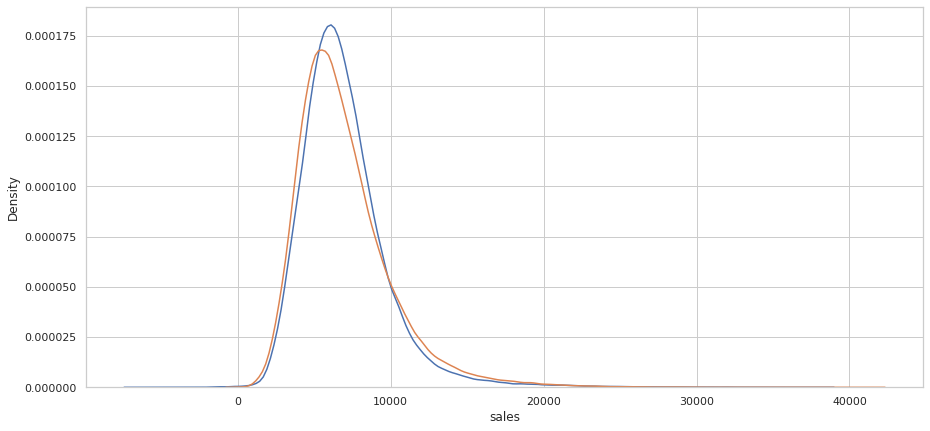

In [ ]:
rscore = r2_score(ytest,yrtpredicted)
print(rscore)
plt.figure(figsize=(15,7))
sns.kdeplot(yrtpredicted)
sns.kdeplot(ytest)

### **Lasso Regression**

In [ ]:
lasso = Lasso()
# Fit the Algorithm
lasreg = lasso.fit(xtrain, ytrain)
# Predict on the model
yltpredicted = lasso.predict(xtest)

<AxesSubplot:xlabel='sales'>

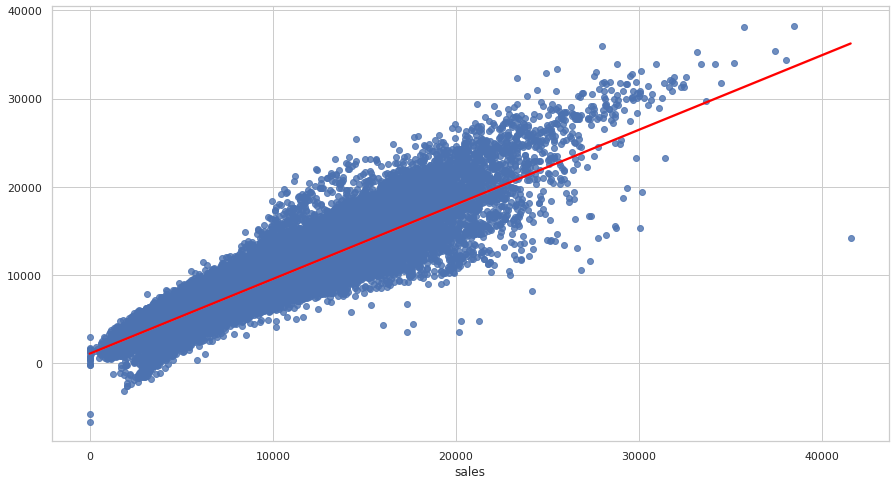

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=ytest, y=yltpredicted, data=xtest, line_kws={"color" : 'red'})

In [ ]:
# validation
print("Regresion Model Score" , ":" , lasreg.score(xtrain, ytrain) , "\n" ,
      "Out of Sample Test Score" ,":" , lasreg.score(xtest, ytest))
print('\n')
ylpredicted = lasso.predict(xtrain)

print("Training RMSE", ":", rmse(ytrain, ylpredicted),
      "\nTesting RMSE", ":", rmse(ytest, yltpredicted))

Regresion Model Score : 0.8452895070725581 
 Out of Sample Test Score : 0.8461690870889387


Training RMSE : 1221.5388696153768 
Testing RMSE : 1216.2242215300673


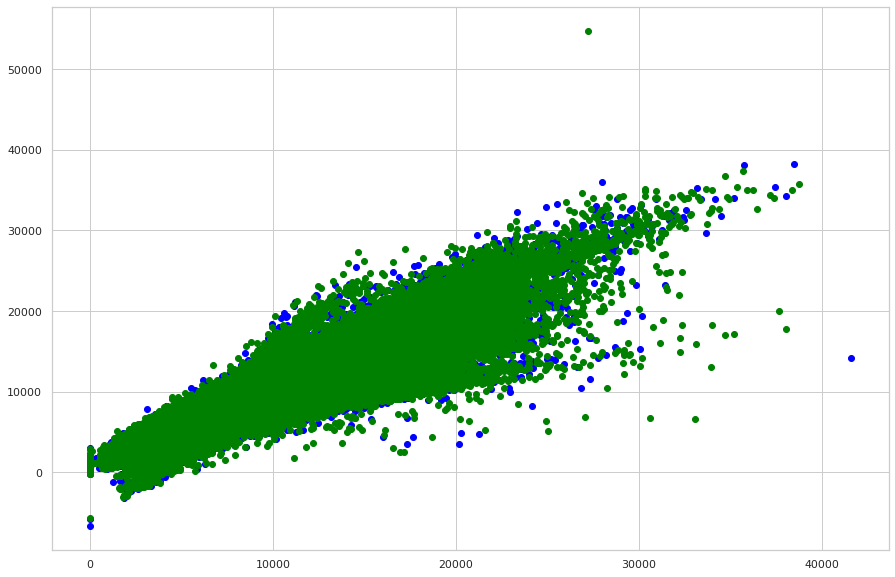

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(ytest, yltpredicted, color = 'blue')
plt.scatter(ytrain, lasso.predict(xtrain), color = 'green')
plt.show()

0.8461690870889387


<AxesSubplot:xlabel='sales', ylabel='Density'>

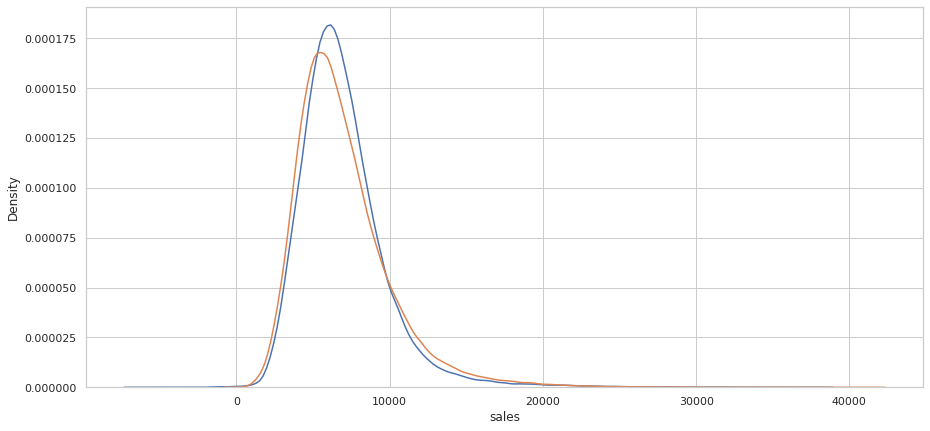

In [ ]:
rscore = r2_score(ytest,yltpredicted)
print(rscore)
plt.figure(figsize=(15,7))
sns.kdeplot(yltpredicted)
sns.kdeplot(ytest)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

2. Cross- Validation & Hyperparameter Tuning

3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.

# **Model 2 Random Forest**

In [ ]:
rdf = RandomForestRegressor(n_estimators=10)
rdfreg = rdf.fit(xtrain, ytrain)
print("Regresion Model Score" , ":" , rdfreg.score(xtrain, ytrain) , "\n" ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xtest, ytest))   
print("\n")
y_predicted = rdfreg.predict(xtrain)
y_test_predicted = rdfreg.predict(xtest)

print("Training RMSE", ":", rmse(ytrain, y_predicted),
      "\nTesting RMSE", ":", rmse(ytest, y_test_predicted))

Regresion Model Score : 0.9944343503666024 
 Out of Sample Test Score : 0.9699136368511516


Training RMSE : 231.68895866328967 
Testing RMSE : 537.8692126621028


**Cross Validation**

0.9699136368511516


<AxesSubplot:xlabel='sales', ylabel='Density'>

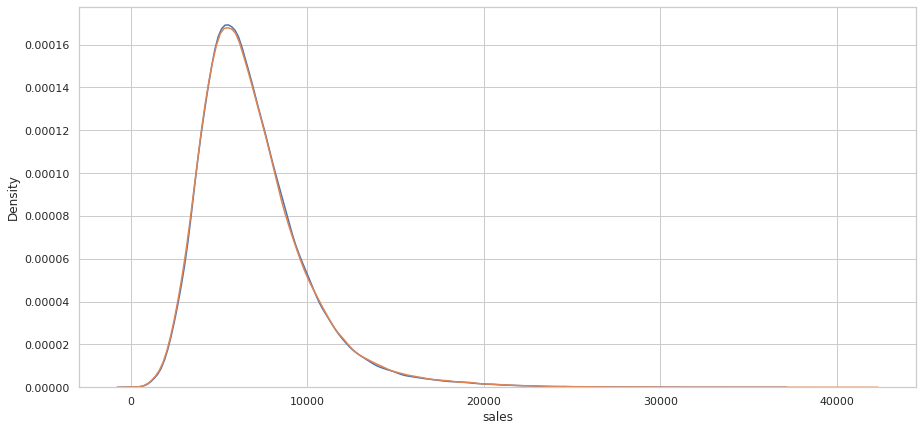

In [ ]:
rscore = r2_score(ytest,y_test_predicted)
print(rscore)
plt.figure(figsize=(15,7))
sns.kdeplot(y_test_predicted)
sns.kdeplot(ytest)

**Feature importance in the Random Forest**

Feature: 0, Score: 0.00100
Feature: 1, Score: 0.00093
Feature: 2, Score: 0.00130
Feature: 3, Score: 0.00176
Feature: 4, Score: 0.00198
Feature: 5, Score: 0.00034
Feature: 6, Score: 0.00120
Feature: 7, Score: 0.00168
Feature: 8, Score: 0.00199
Feature: 9, Score: 0.00112
Feature: 10, Score: 0.00099
Feature: 11, Score: 0.00145
Feature: 12, Score: 0.00133
Feature: 13, Score: 0.00271
Feature: 14, Score: 0.00161
Feature: 15, Score: 0.00247
Feature: 16, Score: 0.00088
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00009
Feature: 19, Score: 0.00002
Feature: 20, Score: 0.00006
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00114
Feature: 23, Score: 0.00110
Feature: 24, Score: 0.00026
Feature: 25, Score: 0.00065
Feature: 26, Score: 0.00085
Feature: 27, Score: 0.00048
Feature: 28, Score: 0.00151
Feature: 29, Score: 0.00205
Feature: 30, Score: 0.00300
Feature: 31, Score: 0.00142
Feature: 32, Score: 0.00113
Feature: 33, Score: 0.00213
Feature: 34, Score: 0.00080
Feature: 35, Score: 0.00152
Fe

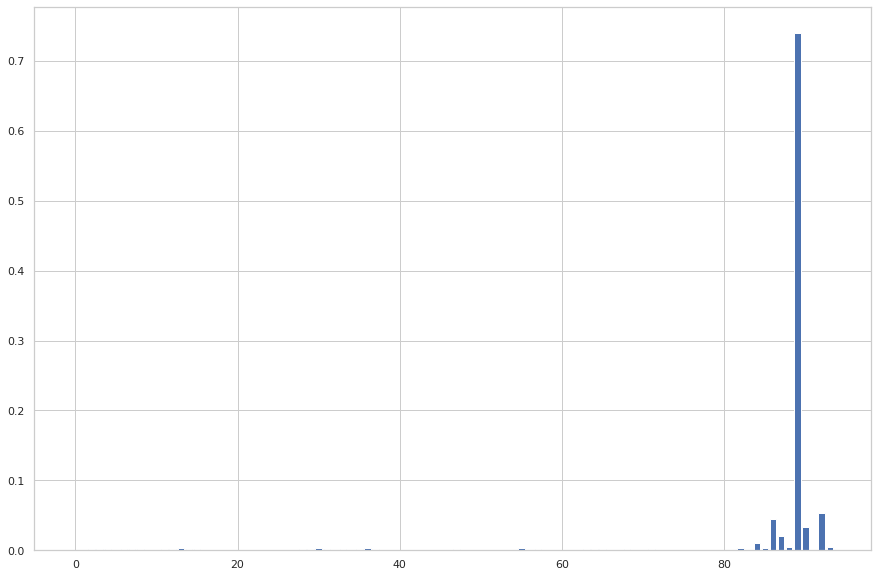

In [ ]:
# get importance
importance = rdfreg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

2. Cross- Validation & Hyperparameter Tuning

3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Different regression models were evaluated based on the CV scores and it’s observed that KNeighborsRegressor regression best fits the data compared to all the other methods.

We can also observe that a perfect linear model is not a good approximation for the given data set.

The reason behind the performance of respective models for the given data can be further understood by looking at the relationship between the observed and target variables.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***